# Cvičení 1: Úvod do jazyka R

Interpret jazyka R spustíme snadno z příkazové řádky:
```
[jp@riemann ~]$ R

R version 4.2.0 alpha (2022-04-01 r82059)
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

[Previously saved workspace restored]

> 
```

Je patrné, že R umí nějaká dema, nápovědu, doplňování syntaxe apod. Navíc umí ukládat a obnovovat workspace, tj. proměnné. Nápovědu lze velmi jednoduše vyvolat i pomocí prefixového otazníku:
```
> ?c()
```

Pokud nevíme, jak se funkce jmenuje, ale víme, co by měla dělat, můžeme použít příkaz `apropos()`:

In [19]:
apropos('iqr')

[1] "format.libraryIQR" "IQR"               "print.libraryIQR"

eventuálně `help.search()`:

In [20]:
help.search('iqr')

R Information

Help files with alias or concept or title matching ‘iqr’ using regular
expression matching:


base::library           Loading/Attaching and Listing of Packages
  Aliases: format.libraryIQR, print.libraryIQR
EnvStats::iqr           Interquartile Range
  Aliases: iqr
EnvStats::stat_median_iqr_text
                        Add Text Indicating the Median and
                        Interquartile Range to a ggplot2 Plot
  Aliases: stat_median_iqr_text
EnvStats::StatNText     Internal EnvStats Objects
  Aliases: StatMedianIQRText
GGally::ggally_summarise_by
                        Summarize a continuous variable by each value
                        of a discrete variable
  Aliases: weighted_median_iqr
ggpubr::add_summary     Add Summary Statistics onto a ggplot.
  Aliases: median_iqr
matrixStats::rowIQRs    Estimates of the interquartile range for each
                        row (column) in a matrix
  Aliases: rowIQRs, colIQRs, iqr
matrixStats::varDiff    Estimation of scale 

My budeme pracovat v prostředí `jupyter notebook` resp. `jupyter lab`. Populárními alternativami jsou [RStudio](https://www.rstudio.com/), [RKWard](https://rkward.kde.org/), [rattle](https://rattle.togaware.com/), fajnšmekři mohou využívat [ViM](https://www.freecodecamp.org/news/turning-vim-into-an-r-ide-cd9602e8c217).

## Prostředí R (R environment)
Podívejme se na některé vlastnosti prostředí jazyka R.

### Co v noteboocích nevyužijeme
Pokud bychom pracovali přímo v interpretu jazyka R, potřebovali bychom mít přehled o existujících proměnných:

```
> ls()
 [1] "Date"        "DayOfWeek"   "fitted"      "household"   "hrs_yr"     
 [6] "ind"         "logreg"      "MonthOfYear" "newdata.pr"  "newsvm"     
[11] "reg"         "res"         "residues"    "rounded"     "svm"        
[16] "time"        "y"    
```

Proměnné můžeme mazat pomocí `rm()`. Celý existující workspace můžeme uložit příkazem `save.image()`, který vytvoří soubor `.RData`, pokud neřekneme jinak. Tento soubor je automaticky natažen při startu R. Pokud bychom vytvářeli alternativní soubory pomocí `save.image()`, jejich opětovné natažení provedeme příkazem `load()`.

### Skriptování
Namísto psaní příkazů řádek po řádku si můžeme připravit skripty, podobně jako to děláme v jiných interpretovaných jazycích (python, perl...). Skript spustíme pomocí `source()`.

## R jako lepší kalkulačka

Podobně jako v příkazovém interpretu pythonu, perlu apod. i s R můžeme pracovat jako s jednoduchou kalkulačkou:

In [22]:
pi

[1] 3.141593

In [23]:
sin(2*pi)

[1] -2.449294e-16

Následující kód realizuje náhodný výběr o rozsahu ```k``` z normálního rozdělení, vytiskne první hodnoty a vykreslí histogram:

[1] -0.86921652  0.49791365  0.05080403 -0.41107349 -0.56076851 -0.09640135

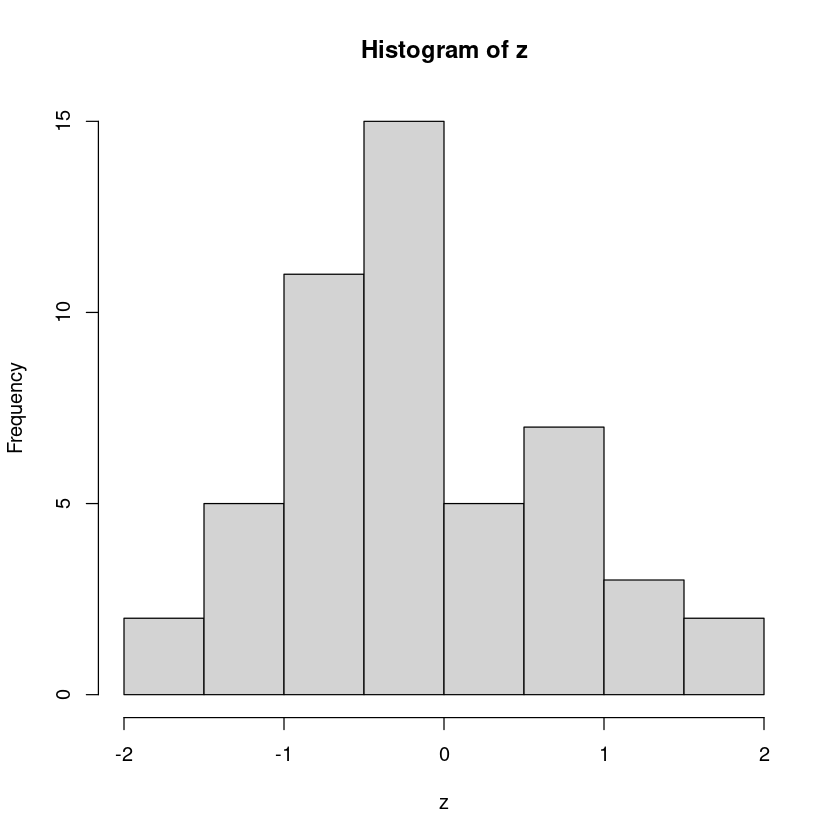

In [24]:
k <- 50
z <- rnorm(k)
head(z)
hist(z)

Konvence pro pojmenování proměnných jsou poměrně volné, nicméně vyhrazena jsou písmenka ```c, q, t, C, D, F, I``` a ```T```. Je běžné potkávat se s proměnnými obsahujícími tečku, např. ```salary.1yr```.

Asi nejčastěji pracujeme s vektory. Nejsou-li dlouhé, můžeme je zadat pomocí ```c()```. Pár funkcí pro začátek:

In [25]:
lunch.price <- c(110, 140, 99, 167, 139, 150, 117, 123, 118, 203, 117, 231)
print(lunch.price)
lunch.price <- c(lunch.price, 111, 112, 113)
print(lunch.price)

 [1] 110 140  99 167 139 150 117 123 118 203 117 231
 [1] 110 140  99 167 139 150 117 123 118 203 117 231 111 112 113


In [26]:
lunch.price[c(1,2,3)]           # selection by indexing
lunch.price[-c(1,2,3)]          # selection by exclusion
lunch.price[lunch.price > 130 & lunch.price < 150]  # conditional selection

[1] 110 140  99

[1] 167 139 150 117 123 118 203 117 231 111 112 113

[1] 140 139

In [27]:
summary(lunch.price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   99.0   112.5   118.0   136.7   145.0   231.0 

In [28]:
range(lunch.price)

[1]  99 231

In [29]:
mean(lunch.price)
var(lunch.price)
sd(lunch.price)

[1] 136.6667

[1] 1405.667

[1] 37.49222

In [30]:
lunch.price_squared <- lunch.price^2
lunch.price_squared

[1] 12100 19600  9801 27889 19321 22500 13689 15129 13924 41209 13689 53361
[13] 12321 12544 12769

<font color="blue">**Nyní je čas udělat úkoly 1.a a 1.b v druhém notebooku**</font>

---

## R jako programovací jazyk

R je programovací jazyk, má tedy nástroje pro vytváření podmínek, cyklů, podporu OOP atd. Na úzkou množinu se podívejme blíže.

### `if` - podmíněné vykonávání kódu

In [31]:
x <- runif(1)
print(x)
if(x < 0.3) {
    print("Value is less than 0.3")
} else if(x < 0.5) {
    print("Value is between 0.3 and 0.5")
} else {
    print("Value is between 0.5 and 1")
}

[1] 0.7879588
[1] "Value is between 0.5 and 1"


### `for`, `while` a `repeat`
Podíváme se jen na `for` cyklus:

In [32]:
for (x in 1:5) {
    print(x**2)
} 

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25


<font color="blue">**Nyní je čas udělat úkoly 2.a a 2.b v druhém notebooku**</font>

---

## R jako statisticky orientovaný software

Nyní trochu předběhneme a ukážeme si, proč R chceme umět: udělá za nás spoustu práce ve statistice! Coby absolventi BI-PST zkuste rozklíčovat následující řádek:

In [33]:
t.test(lunch.price, mu=150, conf.level=0.9, alternative="two.sided")


	One Sample t-test

data:  lunch.price
t = -1.3773, df = 14, p-value = 0.19
alternative hypothesis: true mean is not equal to 150
90 percent confidence interval:
 119.6164 153.7169
sample estimates:
mean of x 
 136.6667 


> **Úloha: Obědy zdražily o 10%. Otestujte na standardní hladině významnosti, zda je nově střední hodnota 150Kč oproti alternativě, že je menší.**

In [34]:
t.test(lunch.price * 1.1, mu=150, alternative="less")


	One Sample t-test

data:  lunch.price * 1.1
t = 0.031303, df = 14, p-value = 0.5123
alternative hypothesis: true mean is less than 150
95 percent confidence interval:
     -Inf 169.0886
sample estimates:
mean of x 
 150.3333 


<font color="blue">**Nyní je čas udělat úkol 3.a v druhém notebooku**</font>

---
## Ponořme se hlouběji do datových struktur

Některé užitečné předdefinované proměnné, jejichž použití demonstrujeme níže:

In [35]:
letters
LETTERS
month.name
month.abb

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

[1] "January"   "February"  "March"     "April"     "May"       "June"     
 [7] "July"      "August"    "September" "October"   "November"  "December"

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

### Matice

Kromě konstrukce pomocí `matrix` a spojování vektorů pomocí `rbind()` a `cbind()` jsou užitečné zejména:
- `t()` - transpozice
- `dim()` - tisk či změna dimenze
- `rownames()` a `colnames()` - pojmenování řádků/sloupců

In [36]:
matrix_a <- matrix(data=1:15, nrow=3, byrow=T)
print(matrix_a)

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    2    3    4    5
[2,]    6    7    8    9   10
[3,]   11   12   13   14   15


In [37]:
print(t(matrix_a))

     [,1] [,2] [,3]
[1,]    1    6   11
[2,]    2    7   12
[3,]    3    8   13
[4,]    4    9   14
[5,]    5   10   15


In [38]:
matrix_b <- cbind(1:5, 6:10, 11:15)
print(matrix_b)

     [,1] [,2] [,3]
[1,]    1    6   11
[2,]    2    7   12
[3,]    3    8   13
[4,]    4    9   14
[5,]    5   10   15


U sekvencí typu `1:5` či ekvivalentně `seq(1,5)` je zjevně důležité mít na paměti rozdílnost oproti pythonu!

In [39]:
rownames(matrix_a) <- month.abb[1:3]
colnames(matrix_a) <- LETTERS[1:5]
print(matrix_a)

     A  B  C  D  E
Jan  1  2  3  4  5
Feb  6  7  8  9 10
Mar 11 12 13 14 15


### Typ `list`

Tento datový typ se trochu podobá pythonímu dictionary:

In [40]:
lunch_prices <- list(old=lunch.price, new=lunch.price*1.1)
print(lunch_prices)

$old
 [1] 110 140  99 167 139 150 117 123 118 203 117 231 111 112 113

$new
 [1] 121.0 154.0 108.9 183.7 152.9 165.0 128.7 135.3 129.8 223.3 128.7 254.1
[13] 122.1 123.2 124.3



In [41]:
print(lunch_prices$old)

 [1] 110 140  99 167 139 150 117 123 118 203 117 231 111 112 113


In [42]:
lunch_prices$new_extended <- c(lunch_prices$new, 122, 123, 124, 125)
print(lunch_prices)

$old
 [1] 110 140  99 167 139 150 117 123 118 203 117 231 111 112 113

$new
 [1] 121.0 154.0 108.9 183.7 152.9 165.0 128.7 135.3 129.8 223.3 128.7 254.1
[13] 122.1 123.2 124.3

$new_extended
 [1] 121.0 154.0 108.9 183.7 152.9 165.0 128.7 135.3 129.8 223.3 128.7 254.1
[13] 122.1 123.2 124.3 122.0 123.0 124.0 125.0



Pojďme na data aplikovat nějakou funkci. `lapply()` vrátí **l**ist, `sapply()` se pokusí udělat **s**implified output:

In [43]:
print(lapply(lunch_prices, mean))

$old
[1] 136.6667

$new
[1] 150.3333

$new_extended
[1] 144.6842



In [44]:
print(sapply(lunch_prices, mean))

         old          new new_extended 
    136.6667     150.3333     144.6842 


<font color="blue">**Nyní je čas udělat úkoly 4.a a 4.b v druhém notebooku**</font>

---

### Data frames

Zatímco `list` nemusí být nutně vnitřně provázaný (jak ukazuje buňka výše s nestejnými počty prvků listu), `data.frame` už je vlastně tabulka s vazbami pro jednotlivé řádky. To mimo jiné znamená, že všechny sloupce mají stejnou délku.

In [45]:
df <- data.frame(lunch_prices$old, lunch_prices$new)
print(df)

   lunch_prices.old lunch_prices.new
1               110            121.0
2               140            154.0
3                99            108.9
4               167            183.7
5               139            152.9
6               150            165.0
7               117            128.7
8               123            135.3
9               118            129.8
10              203            223.3
11              117            128.7
12              231            254.1
13              111            122.1
14              112            123.2
15              113            124.3


In [46]:
print(df$lunch_prices.new)

 [1] 121.0 154.0 108.9 183.7 152.9 165.0 128.7 135.3 129.8 223.3 128.7 254.1
[13] 122.1 123.2 124.3


In [47]:
summary(df)

 lunch_prices.old lunch_prices.new
 Min.   : 99.0    Min.   :108.9   
 1st Qu.:112.5    1st Qu.:123.8   
 Median :118.0    Median :129.8   
 Mean   :136.7    Mean   :150.3   
 3rd Qu.:145.0    3rd Qu.:159.5   
 Max.   :231.0    Max.   :254.1   

Protože přístup k vnitřním proměnným v data framu může být poněkud těžkopádný, s oblibou využíváme funkce `attach()` a `detach()`:

In [48]:
attach(df)
print(lunch_prices.old)
detach(df)

 [1] 110 140  99 167 139 150 117 123 118 203 117 231 111 112 113


## Factors

Kategorické proměnné jako diagnóza, stádium apod. jsou typ *factor*. Tento typ de facto slovně pojmenovává jednotlivé kategorie. Vytvoříme si dva vektory, v jednom budou hodnoty, v druhém faktor a slepíme je do jednoho data framu:

In [50]:
student.avg <- c(1.2, 1.4, 3.2, 2.8, 3.4, 2.2, 2.7)    # average mark
student.cls <- c(1, 1, 3, 2, 3, 2, 2)                  # classification group
student.cls <- factor(student.cls, levels=1:3, order=T)
levels(student.cls) <- c("excellent", "average", "poor")

student_df <- data.frame(student.avg, student.cls)
print(student_df)

  student.avg student.cls
1         1.2   excellent
2         1.4   excellent
3         3.2        poor
4         2.8     average
5         3.4        poor
6         2.2     average
7         2.7     average


Interně jsou faktory reprezentovány čísly, takže funguje třídění apod.:

Pro faktory existuje funkce podobná `lapply()` a `sapply()`, a sice `tapply()`, vrací **t**abulku:

In [51]:
print(tapply(student_df$student.avg, student_df$student.cls, mean))

excellent   average      poor 
 1.300000  2.566667  3.300000 


<font color="blue">**Nyní je čas udělat úkoly 5.a až 5.c v druhém notebooku**</font>

---
---